---
**This notebook uses the Python 3.5 kernel.**  

---

# Setup

In [1]:
%matplotlib inline
import timeit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("NumPy   %s" % np.__version__)
print("Seaborn %s" % sns.__version__)

NumPy   1.12.1
Seaborn 0.7.1


In [3]:
# Set values to expand lists
vals = list(np.geomspace(10, 1000000, num=6, dtype='int'))

# timeit example
[timeit.timeit('range(%d)' % num) for num in vals]

[0.28603467100003854,
 0.26108786800000416,
 0.30416715900003055,
 0.33752889199996616,
 0.3695321290000493,
 0.39469377799997574]

---

# Plot Functions

In [4]:
def my_plot1(vals, times1, times2, time1_name='time 1', time2_name='time 2', 
             title="", ylabel="", xlabel=""):
    '''
    Function printing barplot of times with legend.
    '''
    plt.plot(np.log10(vals), times1);
    plt.plot(np.log10(vals), times2);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.xticks(range(1,6));
    plt.legend([time1_name, time2_name])

In [5]:
def my_plot2(times1, times2, time1_name='time 1', time2_name='time 2', 
             title="", ylabel="", xlabel=""):
    '''
    Same as my_plot1 but log(x-axis) and log(y_axis).
    '''
    # Setup
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ind = np.arange(6)                
    width = 0.35
    # Plots
    bar1 = ax.bar(ind, times1, width, color='darkblue', log=True)
    bar2 = ax.bar(ind+width, times2, width, color='darkgreen', log=True)
    ax.legend( (bar1[0], bar2[0]), (time1_name, time2_name) );
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

---

# Looping Over A Collection

In [6]:
# Looping over a collection
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [colors[i] for i in range(len(colors))]        
    else:
        print('\nBetter')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [color for color in colors]

Bad
100000 loops, best of 3: 4.07 µs per loop
10000 loops, best of 3: 26.7 µs per loop
1000 loops, best of 3: 274 µs per loop
100 loops, best of 3: 2.97 ms per loop
10 loops, best of 3: 30.3 ms per loop
1 loop, best of 3: 307 ms per loop

Better
100000 loops, best of 3: 2.33 µs per loop
100000 loops, best of 3: 13.6 µs per loop
10000 loops, best of 3: 106 µs per loop
1000 loops, best of 3: 1.2 ms per loop
100 loops, best of 3: 11.9 ms per loop
10 loops, best of 3: 122 ms per loop


In [7]:
def slow_collection():
    out = [timeit.timeit("[colors[i] for i in range(len(colors))]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_collection():
    out = [timeit.timeit("[color for color in colors]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [8]:
sc = slow_collection()
fc = fast_collection()

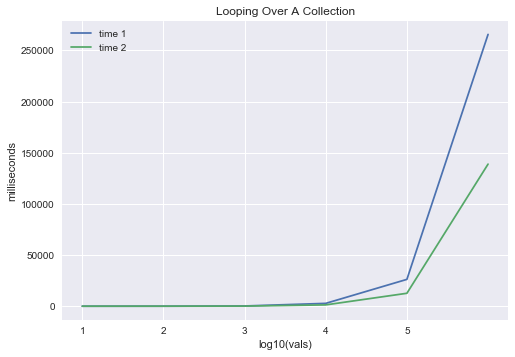

In [9]:
my_plot1(vals, sc, fc, 
         title="Looping Over A Collection", 
         xlabel="log10(vals)", 
         ylabel="milliseconds")

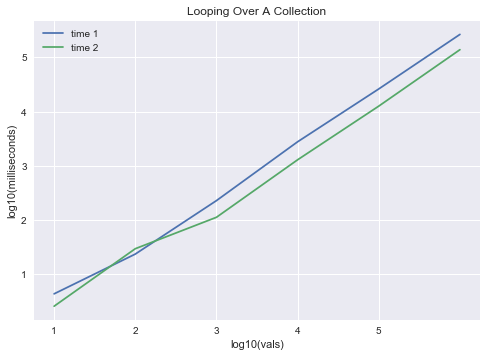

In [10]:
my_plot1(vals, np.log10(sc), np.log10(fc), 
        title="Looping Over A Collection", 
        xlabel="log10(vals)", 
        ylabel="log10(milliseconds)")

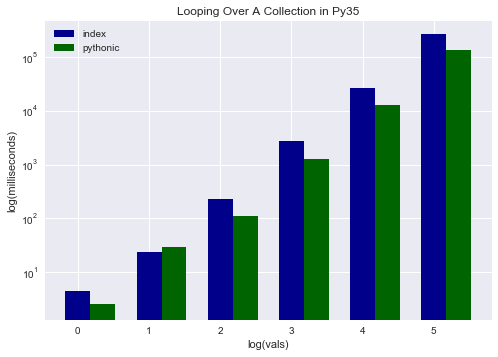

In [11]:
my_plot2(sc, fc, time1_name='index', time2_name='pythonic',
         title="Looping Over A Collection in Py35", 
         xlabel='log(vals)', 
         ylabel="log(milliseconds)")
#plt.savefig('/Users/davidziganto/Desktop/loopcollectionpy35.png')

---

# Sorting Lists

In [12]:
# Sorting lists
for choice in ['range', 'reversed']:   
    if choice is 'range':
        print('range')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [colors[i] for i in range(len(colors)-1, -1, -1)]     
    else:
        print('\nreversed')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [color for color in reversed(colors)]

range
100000 loops, best of 3: 3.95 µs per loop
10000 loops, best of 3: 26.1 µs per loop
1000 loops, best of 3: 254 µs per loop
100 loops, best of 3: 2.85 ms per loop
10 loops, best of 3: 27.5 ms per loop
1 loop, best of 3: 272 ms per loop

reversed
100000 loops, best of 3: 2.44 µs per loop
100000 loops, best of 3: 14 µs per loop
10000 loops, best of 3: 111 µs per loop
1000 loops, best of 3: 1.21 ms per loop
100 loops, best of 3: 12.2 ms per loop
10 loops, best of 3: 126 ms per loop


In [13]:
def slow_sort():
    out = [timeit.timeit("[colors[i] for i in range(len(colors)-1, -1, -1)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_sort():
    out = [timeit.timeit("[color for color in reversed(colors)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [14]:
ss = slow_sort()
fs = fast_sort()

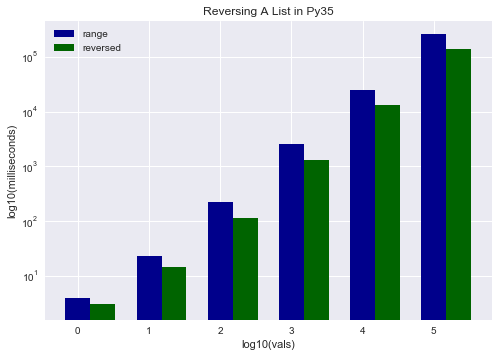

In [35]:
my_plot2(ss, fs, time1_name='range', time2_name='reversed',
         title="Reversing A List in Py35", 
         xlabel="log10(vals)", 
         ylabel="log10(milliseconds)")
plt.savefig('/Users/davidziganto/Desktop/sortinglistpy35.png')

---

# Looping Over A Collection & Indices

In [16]:
# Looping over a collection and indices
for choice in ['range', 'enumerate']:   
    if choice is 'range':
        print('range')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [(i, colors[i]) for i in range(len(colors))]
        
    else:
        print('\nenumerate')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [(i, colors[i]) for i, color in enumerate(colors)]

range
100000 loops, best of 3: 5.05 µs per loop
10000 loops, best of 3: 39.6 µs per loop
1000 loops, best of 3: 427 µs per loop
100 loops, best of 3: 5.08 ms per loop
10 loops, best of 3: 67.9 ms per loop
1 loop, best of 3: 665 ms per loop

enumerate
100000 loops, best of 3: 5.56 µs per loop
10000 loops, best of 3: 45.8 µs per loop
1000 loops, best of 3: 507 µs per loop
100 loops, best of 3: 5.62 ms per loop
10 loops, best of 3: 72.2 ms per loop
1 loop, best of 3: 760 ms per loop


In [17]:
def slow_collection_indices():
    out = [timeit.timeit("[(i, colors[i]) for i in range(len(colors))]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_collection_indices():
    out = [timeit.timeit("[(i, colors[i]) for i, color in enumerate(colors)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [18]:
sci = slow_collection_indices()
fci = fast_collection_indices()

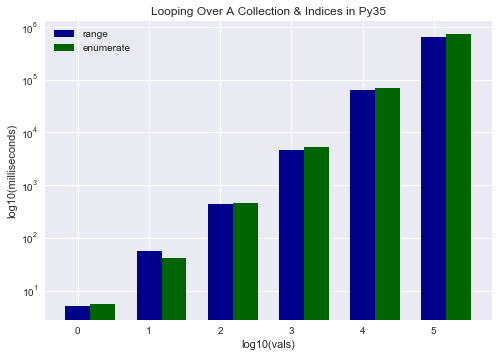

In [34]:
my_plot2(sci, fci, time1_name='range', time2_name='enumerate',
         title="Looping Over A Collection & Indices in Py35", 
         xlabel="log10(vals)", 
         ylabel="log10(milliseconds)")
#plt.savefig('/Users/davidziganto/Desktop/loopcollectionindicespy35.png')

---

# Looping Over Two Collections

In [20]:
# Loop over two collections
for choice in ['range', 'zip']:   
    if choice is 'range':
        print('range')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            names = list('abcd')*val
            %timeit [(names[i], colors[i]) for i in range(min(len(names), len(colors)))]
    else:
        print('\nzip')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            names = list('abcd')*val
            %timeit [(name, color) for name, color in zip(names, colors)]

range
100000 loops, best of 3: 6.91 µs per loop
10000 loops, best of 3: 59.7 µs per loop
1000 loops, best of 3: 621 µs per loop
100 loops, best of 3: 7.11 ms per loop
10 loops, best of 3: 77.8 ms per loop
1 loop, best of 3: 801 ms per loop

zip
100000 loops, best of 3: 4.37 µs per loop
10000 loops, best of 3: 31.3 µs per loop
1000 loops, best of 3: 319 µs per loop
100 loops, best of 3: 3.77 ms per loop
10 loops, best of 3: 46.9 ms per loop
1 loop, best of 3: 518 ms per loop


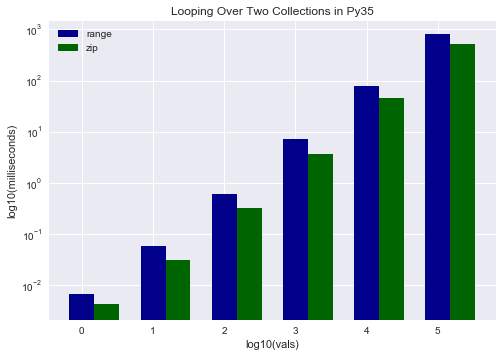

In [33]:
my_plot2([6.91e-3, 59.7e-3, 621e-3, 7.11, 77.8, 801], [4.37e-3, 31.3e-3, 319e-3, 3.77, 46.9, 518], 
         time1_name='range', time2_name='zip',
         title="Looping Over Two Collections in Py35", 
         xlabel="log10(vals)", 
         ylabel="log10(milliseconds)")
#plt.savefig('/Users/davidziganto/Desktop/loop2collectionspy35.png')

---

# Appending Strings

In [22]:
# Appending Strings
my_string = ""
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('+=')
        for val in vals:
            mylist = list('abcdefghijklmnopqrstuvwxyz')*val
            %time for item in mylist: my_string += item
    else:
        print('\n.join')
        for val in vals:
            mylist = list('abcdefghijklmnopqrstuvwxyz')*val
            %time my_string = "".join([item for item in mylist])

+=
CPU times: user 83 µs, sys: 1 µs, total: 84 µs
Wall time: 88.9 µs
CPU times: user 484 µs, sys: 0 ns, total: 484 µs
Wall time: 487 µs
CPU times: user 5.31 ms, sys: 368 µs, total: 5.68 ms
Wall time: 5.52 ms
CPU times: user 54.7 ms, sys: 1.5 ms, total: 56.2 ms
Wall time: 56.1 ms
CPU times: user 581 ms, sys: 7.08 ms, total: 588 ms
Wall time: 593 ms
CPU times: user 5.79 s, sys: 36 ms, total: 5.83 s
Wall time: 5.85 s

.join
CPU times: user 28 µs, sys: 1.45 ms, total: 1.48 ms
Wall time: 1.49 ms
CPU times: user 99 µs, sys: 1e+03 ns, total: 100 µs
Wall time: 102 µs
CPU times: user 878 µs, sys: 3 µs, total: 881 µs
Wall time: 884 µs
CPU times: user 10.2 ms, sys: 913 µs, total: 11.1 ms
Wall time: 11.2 ms
CPU times: user 94.3 ms, sys: 15.3 ms, total: 110 ms
Wall time: 111 ms
CPU times: user 931 ms, sys: 120 ms, total: 1.05 s
Wall time: 1.06 s


---

# Using Standard Library

In [23]:
# Standard Library

for choice in ['listexp', 'map']:   
    if choice is 'listexp':
        print('listexp')
        for val in vals:
            %timeit [np.cumsum(item) for item in range(val)]
    else:
        print('\nmap')
        for val in vals:
            %timeit newlist = map(np.cumsum, range(val))

listexp
10000 loops, best of 3: 59 µs per loop
1000 loops, best of 3: 602 µs per loop
100 loops, best of 3: 5.99 ms per loop
10 loops, best of 3: 58.7 ms per loop
1 loop, best of 3: 602 ms per loop
1 loop, best of 3: 5.98 s per loop

map
The slowest run took 5.08 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 511 ns per loop
1000000 loops, best of 3: 524 ns per loop
1000000 loops, best of 3: 587 ns per loop
The slowest run took 4.31 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 572 ns per loop
1000000 loops, best of 3: 631 ns per loop
The slowest run took 10.17 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 611 ns per loop


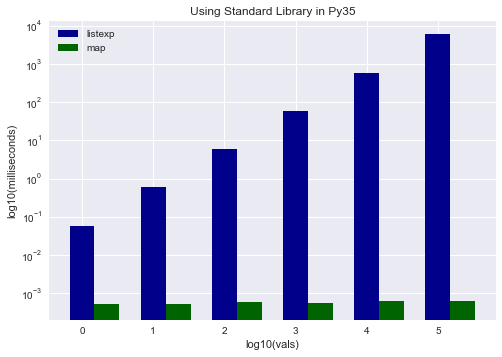

In [30]:
my_plot2([59e-3, 602e-3, 5.99, 58.7, 602, 5.98e3], [511e-6, 524e-6, 587e-6, 572e-6, 631e-6, 611e-6], 
         time1_name='listexp', time2_name='map',
         title="Using Standard Library in Py35", 
         xlabel="log10(vals)", 
         ylabel="log10(milliseconds)")
#plt.savefig('/Users/davidziganto/Desktop/stdlibrarypy35.png')

---

# Listexp vs Genexp

In [25]:
# listexp vs genexp

for choice in ['listexp', 'genexp']:   
    if choice is 'listexp':
        print('listexp')
        for val in vals:
            %timeit [np.cumsum(item) for item in range(val)] # list expression
    else:
        print('\ngenexp')
        for val in vals:
            %timeit (np.cumsum(item) for item in range(val)) # generator expression

listexp
10000 loops, best of 3: 64.6 µs per loop
1000 loops, best of 3: 601 µs per loop
100 loops, best of 3: 6.04 ms per loop
10 loops, best of 3: 70.8 ms per loop
1 loop, best of 3: 751 ms per loop
1 loop, best of 3: 6.3 s per loop

genexp
The slowest run took 5.25 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 673 ns per loop
The slowest run took 4.03 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 684 ns per loop
1000000 loops, best of 3: 724 ns per loop
The slowest run took 7.40 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 928 ns per loop
1000000 loops, best of 3: 721 ns per loop
1000000 loops, best of 3: 710 ns per loop


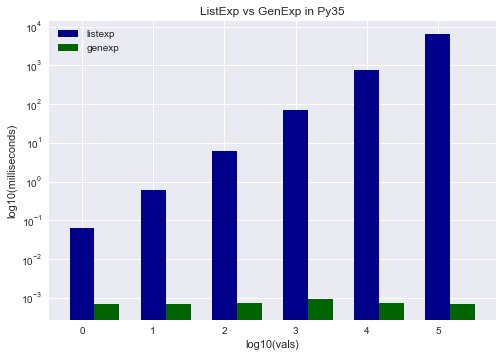

In [31]:
my_plot2([64.6e-3, 601e-3, 6.04, 70.8, 751, 6.3e3], [673e-6, 684e-6, 724e-6, 928e-6, 721e-6, 710e-6], 
         time1_name='listexp', time2_name='genexp',
         title="ListExp vs GenExp in Py35", 
         xlabel="log10(vals)", 
         ylabel="log10(milliseconds)")
#plt.savefig('/Users/davidziganto/Desktop/listgenexppy35.png')

---

# Dots

In [27]:
# Dots matter (marginally)
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        newlist = []
        for val in vals:
            %timeit newlist.append(np.cumsum(val))
    else:
        print('\nBetter')
        newlist = []
        cumsum = np.cumsum
        append = newlist.append
        for val in vals:
            %timeit append(cumsum(val))

Bad
The slowest run took 10.36 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.33 µs per loop
The slowest run took 13.09 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.84 µs per loop
The slowest run took 8.55 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.03 µs per loop
The slowest run took 23.25 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.07 µs per loop
The slowest run took 11.19 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.98 µs per loop
The slowest run took 4.96 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.9 µs per loop

Better
The slowest run took 8.55

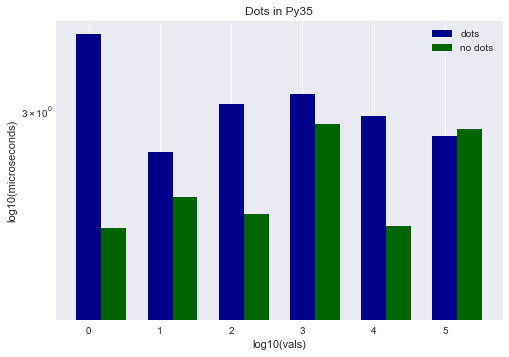

In [32]:
my_plot2([3.33, 2.84, 3.03, 3.07, 2.98, 2.9], [2.56, 2.67, 2.61, 2.95, 2.57, 2.93], 
         time1_name='dots', time2_name='no dots',
         title="Dots in Py35",
         xlabel="log10(vals)",
         ylabel="log10(microseconds)")
#plt.savefig('/Users/davidziganto/Desktop/dotspy35.png')

## Links
[4 Performance Optimization Tips For Faster Python Code](http://blog.hackerearth.com/4-Performance-Optimization-Tips-Faster-Python-Code)  
[PythonSpeed Performance Tips](https://wiki.python.org/moin/PythonSpeed/PerformanceTips)  
[6 Python Performance Tips](https://dzone.com/articles/6-python-performance-tips)